In [15]:
from google.colab import drive
drive.mount('/content/drive')
drive_prefix = '/content/drive/MyDrive/FullDataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## WR: demonstrate use of `json` file

In [16]:
import os
import glob


# WR: this is my path:
drive_prefix = 'drive/MyDrive/FullDataset'

all_files = glob.glob(os.path.join(drive_prefix, '*', '*.tif'))
print(f'found {len(all_files)} tif files in Drive')

found 231 tif files in Drive


In [36]:
import json
import numpy as np


# choose some randomly to demonstrate use of json files
index = np.random.choice(np.arange(len(all_files)), 10, replace=False)

# save information in a list or dictionary (list is ordered, dict has keys)
saved_data = []
for i in index:
    short_filename = all_files[i].replace(drive_prefix, '').strip('/')  # remove the prefix to drive (it can change)
    this_record = {'filename': short_filename,
                   'L_star': int(np.random.rand()*255),  # obviously replace this with real data
                   'coverage': np.random.rand(),
                   }
    saved_data.append(this_record)  # extend the list of files

print(saved_data)
# save to disk via json file
with open('saved_files.json', 'w') as fid:
    json.dump(saved_data, fid)

[{'filename': 'MCV2-200914A-TM_200915/Centre_.0_00004_1.spm.tif', 'L_star': 191, 'coverage': 0.7575632605905019}, {'filename': 'MCV2-210901A-TM_210908/Edge.0_00001_1_rescaled.spm.tif', 'L_star': 140, 'coverage': 0.35597900125909543}, {'filename': 'MCV2-201211A-TM_201217/Center.0_00002_1.spm.tif', 'L_star': 94, 'coverage': 0.9957586192890548}, {'filename': 'MCV2-201111B-TM_201112/Edge.0_00001_1.spm.tif', 'L_star': 144, 'coverage': 0.4265448552519471}, {'filename': 'MCV2-210930A-TM_211001/Center.0_00000_1.spm.tif', 'L_star': 172, 'coverage': 0.006740630759629385}, {'filename': 'MCV2-211102A-TM_211103/Edge.0_00000_1.spm.tif', 'L_star': 114, 'coverage': 0.37293327953808586}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': 43, 'coverage': 0.7960025156916958}, {'filename': 'MCV2-210830A-TM_210831/Center.0_00000_1.spm.tif', 'L_star': 171, 'coverage': 0.8637048053135177}, {'filename': 'MCV2-211014A-TM_211022/Center.0_00001_1.spm.tif', 'L_star': 237, 'coverage': 0.274937

reading MCV2-211005A-TM_211013/Center.0_00000_1.spm.tif from Google Drive...
reading MCV2-201014A-TM_201019/Edge.0_00000_1.spm.tif from Google Drive...
reading MCV2-210826A-TM_210831/Edge.0_00000_1.spm.tif from Google Drive...
reading MCV2-201016A-TM_201019/Center.0_00001_1.spm.tif from Google Drive...
reading MCV2-200821A-TM_200824/Centre_.0_00011_1.spm.tif from Google Drive...
reading MCV2-201020A-TM_201020/Edge.0_00001_1.spm.tif from Google Drive...
reading MCV2-200826A-TM_200831/Centre_.0_00002_1.spm.tif from Google Drive...
reading MCV2-201211A-TM_201217/Center.0_00002_1.spm.tif from Google Drive...
reading Blank Sapphire H2Se Anneal/Center Before Anneal.0_00000_1.spm.tif from Google Drive...
reading MCV2-201111A-TM_201112/Center.0_00001_1.spm.tif from Google Drive...


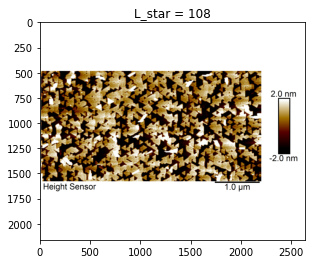

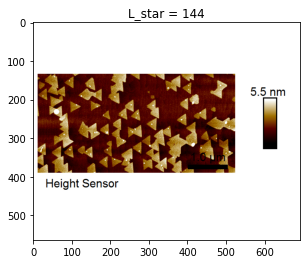

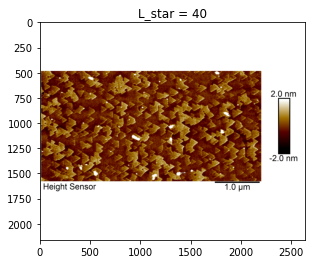

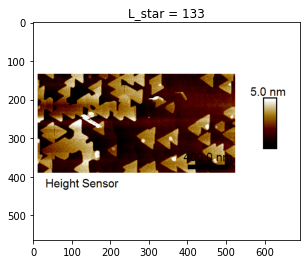

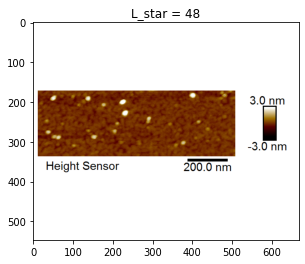

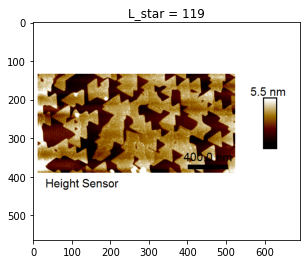

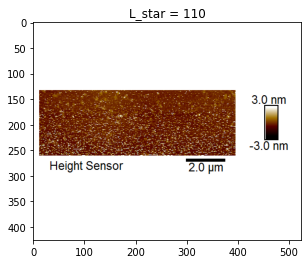

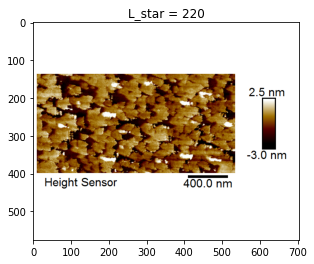

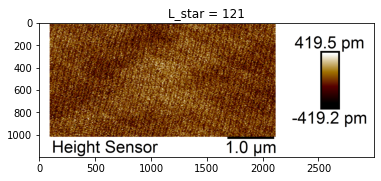

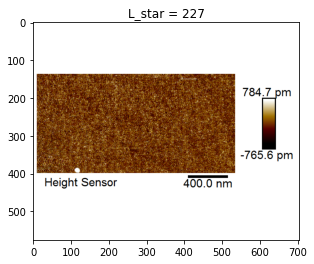

In [18]:
from PIL import Image
from matplotlib import pyplot as plt


# now demonstrate reading back
with open('saved_files.json', 'r') as fid:
    saved_data = json.load(fid)

for record in saved_data:
    short_filename = record['filename']
    print(f'reading {short_filename} from Google Drive...')
    # load with Python Image Library
    afm = Image.open(os.path.join(drive_prefix, short_filename))
    # render with pyplot
    fig, ax = plt.subplots()
    ax.imshow(afm)
    # demonstrate using information from saved record
    ax.set_title(f'L_star = {record["L_star"]}')

## your code...

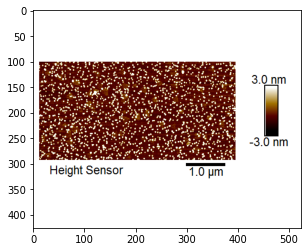

In [19]:
import requests
import zipfile
import sklearn
import json
import numpy as np
import os.path
from scipy import stats, signal, ndimage, interpolate
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
from PIL import Image
from numpy.linalg import norm 
from sklearn.mixture import GaussianMixture

#url = 'https://pennstateoffice365-my.sharepoint.com/:u:/g/personal/wfr5091_psu_edu/EVa-Kjiu8bNOu4o9d9AZJPcBWPXxp7fX3ZdVPj7DMicUkg?e=R6Loam'
#r = requests.get(url + '&download=1')

def open_image(n):    
  with open('data.zip', 'wb') as fid:
      for chunk in r.iter_content(chunk_size=8192): 
          fid.write(chunk)

  with zipfile.ZipFile('data.zip', 'r') as zip_ref:
      zip_ref.extractall('data')
        
  afm = Image.open(f'data/{n}-AFM.png')
  return afm
path = r'/content/drive/MyDrive/FullDataset/MCV2-200826A-TM_200831/Centre_.0_00005_1.spm.tif'
#afm = open_image(5)
afm = Image.open(path)
fig, ax = plt.subplots()
ax.imshow(afm)




In [20]:
import pickle
import numpy as np
from sklearn import decomposition
from plotly import express as px
from matplotlib import pyplot as plt
from PIL import Image
import os
import requests
import json
from PIL import Image
import numpy as np
from scipy import ndimage
import pandas as pd


def rgb_to_lightness(im):
    """Implement the lightness transform found here:
    https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color
    """
    R, G, B = np.array(im).transpose([2, 0, 1])  # get each color channel
    L = (0.299 * R + 0.587 * G + 0.114 * B)  # one possible formula for luminance

    return L


def autocrop(afm):
    # convert to lightness only
    L = rgb_to_lightness(afm)
    # find bounds
    afm_bounds = np.zeros(4, dtype=int)
    for i in range(2):
        min_pixels = np.argwhere(L.min(axis=i) < L.max()).flatten()
        gap_idx = np.argwhere(np.diff(min_pixels) > 1).flatten()[0]
        min_pixels = min_pixels[:gap_idx]
        if len(min_pixels) < 1:
            min_pixels = [L.shape[i]]

        median_pixels = np.argwhere(np.median(L, axis=i) < L.max()).flatten()
        if len(median_pixels) < 1:
            median_pixels = [L.shape[i]]

        afm_bounds[0 + i] = min(min_pixels[0], median_pixels[0])
        afm_bounds[2 + i] = min(min_pixels[-1], median_pixels[-1])

    return afm.crop(box=afm_bounds)


def smooth_histogram(L):
    x = np.arange(0, 255)
    delta = 0.5*np.diff(x)[0]
    x_edge = np.hstack([x - delta, x[-1]+delta])
    yh, xh = np.histogram(L[np.logical_and(L>0, L<255)], bins=x_edge, density=True)
    xc = 0.5 * (xh[1:] + xh[:-1])
    yh = ndimage.gaussian_filter(yh, 6)

    return xc, yh


def get_coverage(L):
    x = np.arange(0, 255)
    delta = 0.5*np.diff(x)[0]
    x_edge = np.hstack([x - delta, x[-1]+delta])

    yh, xh = np.histogram(L, bins=x_edge)
    coverage = 1 - np.cumsum(yh)/np.sum(yh)

    return x, coverage

url = 'https://pennstateoffice365-my.sharepoint.com/:u:/g/personal/wfr5091_psu_edu/EXfY0Qt9qKJFiHvyVd7Rx7gBbale5WiFnas19qHZ-hEYHw?e=pU7vQY'
r = requests.get(url + '&download=1')
with open('data.pkl', 'wb') as fid:
    for chunk in r.iter_content(chunk_size=8192): 
        fid.write(chunk)

with open('data.pkl', 'rb') as fid:
    coverage_data = pickle.load(fid)

coverage_keys = list(coverage_data.keys())
l_curves = np.array([coverage_data[k]['lightness'] for k in coverage_keys])
coverage_est = np.array([val['coverage'][val['estimates']['min']] for val in coverage_data.values()])

#Read data from Json file

In [39]:
with open('data.json', 'r') as file:
    data = json.load(file)
print(data["record"])

[{'file_name': 'MCV2-200826A-TM_200831/Centre_.0_00005_1.spm.tif', 'L_star': '49', 'Coverage': '0.189'}, {'file_name': 'MCV2-200904A-TM_200907/Edge+rt of flat_.0_00002_1.spm.tif', 'L_star': '81', 'Coverage': '0.068'}, {'file_name': 'MCV2-200910A-TM_200910/Edge.0_00001_1.spm.tif', 'L_star': '42', 'Coverage': '0.436'}, {'file_name': 'MCV2-200914A-TM_200915/Centre_.0_00005_1.spm.tif', 'L_star': '54', 'Coverage': '0.35'}, {'file_name': 'MCV2-201021A-TM_201022/Centre_.0_00002_1.spm.tif', 'L_star': '91', 'Coverage': '0.046'}, {'file_name': 'MCV2-201202A-TM_201208/Center.0_00001_1.spm.tif', 'L_star': '162', 'Coverage': '0.064'}, {'file_name': 'MCV2-201202A-TM_201208/Edge.0_00000_1.spm.tif', 'L_star': '140', 'Coverage': '0.15'}, {'file_name': 'MCV2-201202A-TM_201208/Edge.0_00001_1.spm.tif', 'L_star': '122', 'Coverage': '0.133'}, {'file_name': 'MCV2-201208A-TM_201208/Center2.0_00000_1.spm.tif', 'L_star': '56', 'Coverage': '0.827'}, {'file_name': 'MCV2-201211A-TM_201217/Edge.0_00001_1.spm.tif ',

In [56]:
index = np.random.choice(np.arange(len(data)), 10, replace=True)
saved_data = []
cover = ['0.189', '0.068', '0.436', '0.35', '0.046', '0.064', '0.15', '0.133', '0.827', '0.238', '0.863', '0.714', '0.571', '0.712', '0.582']
Lstar = ['49', '81', '42', '54', '91', '162', '140', '122', '56', '128', '26.29', '77.86', '122.54', '67.59', '104.3']

for i in index:
    short_filename = all_files[i].replace(drive_prefix, '').strip('/')  # remove the prefix to drive (it can change)
    L_star = Lstar[i]
    coverage = cover[i]
    this_record = {'filename': short_filename,
                   'L_star': L_star,  # obviously replace this with real data
                   'coverage': coverage,
                   }
    saved_data.append(this_record)  # extend the list of files

print(saved_data)

[{'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}, {'filename': 'MCV2-211022A-TM_211025/Edge.0_00000_1.spm.tif', 'L_star': '49', 'coverage': '0.189'}]

In [29]:
from PIL import Image
from matplotlib import pyplot as plt
import os


# now demonstrate reading back
with open('data.json', 'r') as fid:
    saved_data = json.load(fid)
print(saved_data)
for record in saved_data:
    short_filename = record['file_name']
    print(f'reading {short_filename} from Google Drive...')
    # load with Python Image Librar
    afm = Image.open(os.path.join(drive_prefix, short_filename))
    # render with pyplot
    fig, ax = plt.subplots()
    ax.imshow(afm)
    # demonstrate using information from saved record
    ax.set_title(f'L_star = {record["L_star"]}')

{'record': [{'file_name': 'MCV2-200826A-TM_200831/Centre_.0_00005_1.spm.tif', 'L_star': '49', 'Coverage': '0.189'}, {'file_name': 'MCV2-200904A-TM_200907/Edge+rt of flat_.0_00002_1.spm.tif', 'L_star': '81', 'Coverage': '0.068'}, {'file_name': 'MCV2-200910A-TM_200910/Edge.0_00001_1.spm.tif', 'L_star': '42', 'Coverage': '0.436'}, {'file_name': 'MCV2-200914A-TM_200915/Centre_.0_00005_1.spm.tif', 'L_star': '54', 'Coverage': '0.35'}, {'file_name': 'MCV2-201021A-TM_201022/Centre_.0_00002_1.spm.tif', 'L_star': '91', 'Coverage': '0.046'}, {'file_name': 'MCV2-201202A-TM_201208/Center.0_00001_1.spm.tif', 'L_star': '162', 'Coverage': '0.064'}, {'file_name': 'MCV2-201202A-TM_201208/Edge.0_00000_1.spm.tif', 'L_star': '140', 'Coverage': '0.15'}, {'file_name': 'MCV2-201202A-TM_201208/Edge.0_00001_1.spm.tif', 'L_star': '122', 'Coverage': '0.133'}, {'file_name': 'MCV2-201208A-TM_201208/Center2.0_00000_1.spm.tif', 'L_star': '56', 'Coverage': '0.827'}, {'file_name': 'MCV2-201211A-TM_201217/Edge.0_00001_1

TypeError: ignored

In [ ]:
import requests
import os
import gdown
from tqdm import notebook

list_url = 'https://drive.google.com/drive/folders/1-xf5QeQTbmwoVmAQylNpht_c-tLWVqTl?usp=sharing'
r = requests.get(list_url + '&download=1')

with open('data.json', 'r') as fid:
    data_json = json.load(fid)

all_files = list(data_json.keys())
all_z = np.array([data_json[it] for it in all_files]).flatten()
print(all_z)
all_afm = []
#for s in all_z: 
for filename in notebook.tqdm(all_z):
  gdown.download(list_url + filename, quiet=False)
    
    

#with open(os.path.join(drive_prefix, ), 'r') as fid:
#    data = json.load(fid)

['MCV2-200826A-TM_200831/Centre_.0_00005_1.spm.tif'
 'MCV2-200904A-TM_200907/Edge+rt of flat_.0_00002_1.spm.tif'
 'MCV2-200910A-TM_200910/Edge.0_00001_1.spm.tif'
 'MCV2-200914A-TM_200915/Centre_.0_00005_1.spm.tif'
 'MCV2-201021A-TM_201022/Centre_.0_00002_1.spm.tif'
 'MCV2-201202A-TM_201208/Center.0_00001_1.spm.tif'
 'MCV2-201202A-TM_201208/Edge.0_00000_1.spm.tif'
 'MCV2-201202A-TM_201208/Edge.0_00001_1.spm.tif'
 'MCV2-201208A-TM_201208/Center2.0_00000_1.spm.tif'
 'MCV2-201211A-TM_201217/Edge.0_00001_1.spm.tif ' '__MACOSX/1-AFM.tif'
 '__MACOSX/2-AFM.tif' '__MACOSX/3-AFM.tif' '__MACOSX/4-AFM.tif'
 '__MACOSX/5-AFM.tif']


  0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/drive/folders/1-xf5QeQTbmwoVmAQylNpht_c-tLWVqTl?usp=sharingMCV2-200826A-TM_200831/Centre_.0_00005_1.spm.tif
To: /content/Centre_.0_00005_1.spm.tif

866kB [00:00, 43.1MB/s]
Downloading...
From: https://drive.google.com/drive/folders/1-xf5QeQTbmwoVmAQylNpht_c-tLWVqTl?usp=sharingMCV2-200904A-TM_200907/Edge+rt of flat_.0_00002_1.spm.tif
To: /content/Edge+rt of flat_.0_00002_1.spm.tif

866kB [00:00, 34.7MB/s]
Downloading...
From: https://drive.google.com/drive/folders/1-xf5QeQTbmwoVmAQylNpht_c-tLWVqTl?usp=sharingMCV2-200910A-TM_200910/Edge.0_00001_1.spm.tif
To: /content/Edge.0_00001_1.spm.tif

866kB [00:00, 42.0MB/s]
Downloading...
From: 

#Crop the edge of the image

[10, 137, 533, 397]


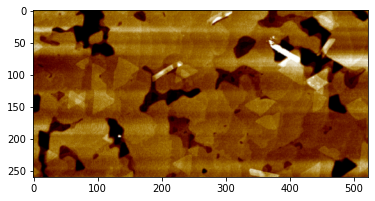

In [ ]:
def autocrop(afm): 
  afm_bounds = np.zeros(4, dtype=int)
  R, G, B = np.array(afm).transpose([2, 0, 1])  # get each color channel
  L = (0.299*R + 0.587*G + 0.114*B)
  for i in range(2):
      valid_pixels = np.argwhere(L.min(axis=i) < L.max()).flatten()
      gap_idx = np.argwhere(np.diff(valid_pixels) > 1).flatten()[0]
      valid_pixels = valid_pixels[:gap_idx]
      afm_bounds[0+i] = valid_pixels[0]
      afm_bounds[2+i] = valid_pixels[-1]
  print(afm_bounds.tolist())
  fig, ax = plt.subplots()
  return ax.imshow(afm.crop(box=afm_bounds))

autocrop(afm)

#Calculate the lightness

In [ ]:
def light_cal(afm):
  afm_bounds = np.zeros(4, dtype=int)
  R, G, B = np.array(afm).transpose([2, 0, 1])
  L = (0.299*R + 0.587*G + 0.114*B)
  for i in range(2):
    valid_pixels = np.argwhere(L.min(axis=i) < L.max()).flatten()
    gap_idx = np.argwhere(np.diff(valid_pixels) > 1).flatten()[0]
    valid_pixels = valid_pixels[:gap_idx]
    afm_bounds[0+i] = valid_pixels[0]
    afm_bounds[2+i] = valid_pixels[-1]
  print(afm_bounds.tolist())
  afm_bounds[3] -= 20
  R, G, B = np.array(afm.crop(box=afm_bounds)).transpose([2, 0, 1])  # get each color channel
  L = (0.299*R + 0.587*G + 0.114*B)  # one possible formula for luminance (https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color)
  L=L.flatten()
  L.sort()
  L=L[::-1]
  print(L)
  #print(L[int(len(L)*man_cov)])
  return L


L= light_cal(afm)

[10, 137, 533, 397]
[255. 255. 255. ...   0.   0.   0.]


In [ ]:
def normaldist(L):
  import scipy.stats as stats
  from scipy import optimize
  x = np.linspace(0, 255)
  def distribution(x, params):
      return params[2]*stats.norm(params[0], params[1]).pdf(x)

  def objective(params, x, target):
      # x, target = args
      predicted = distribution(x, params)
      sum_of_squares = np.sum( (target - predicted)**2 )
      return sum_of_squares

  y, xh = np.histogram(L, bins=100, density=True)
  print(xh.shape, y.shape)
  xc = 0.5 * (xh[1:] + xh[:-1])  # get bin centers, np.histogram returns the edges!

  result = optimize.minimize(objective, [np.mean(L), np.std(L), 1], args=(xc, y))
  mu, sigma = result.x[:2]
  print(f'calculated best fit {mu:.3f} +/- {sigma:.3f}')
  print(f'generating values   {np.mean(L):.3f} +/- {np.std(L):.3f}')
  return mu, sigma
mu, sigma = normaldist(L)

(101,) (100,)
calculated best fit 79.180 +/- 41.424
generating values   79.180 +/- 41.426


[5603  253  348  226  294  193  169  225  171  261  169  186  255  179
  285  195  221  345  210  365  243  374  238  235  336  235  330  252
  253  333  225  347  239  282  305  260  289  224  356  215  241  262
  212  297  215  304  203  263  224  195  330  168  351  171  404  264
  377  353  345  469  396  509  347  635  331  732  339  560  611  629
  744  689  784  649  838  602  405 1019  487  986  685  884  802  794
  933  694 1019  558 1143  461 1240  552 1121  695  930 1007  965 1097
  872 1205  705  583 1310  699 1212  857 1125 1048 1108 1049  828 1225
  582 1486  554 1394  628 1410  826 1084 1179 1038 1233  954 1288  748
 1488  621  864 1290 1020 1181 1085 1071 1060 1097 1052  642 1235  634
 1206  792 1152  859 1050  917  915  937  864  855  711  816  728  757
  712  630  623  561  563  575  500  514  421  454  447  448  411  435
  396  369  301  387  374  320  275  318  333  278  242  249  289  291
  249  222  255  175  218  266  195  150  177  224  168   96  182  202
  141 

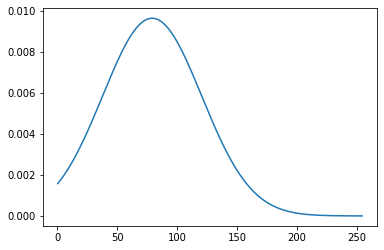

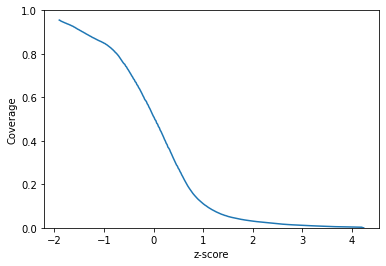

In [ ]:
def plt_cover_z(mu, sigma, L):
  import scipy.stats as stats
  n_bins = int(np.sqrt(len(L)))  # sqrt the number of samples is a good CDF size
  yh, xh = np.histogram(L, bins=n_bins)
  xc = 0.5 * (xh[1:] + xh[:-1])
  coverage = 1 - np.cumsum(yh)/np.sum(yh)
  print(yh)
  # histogram plot
  x = xc
  pdf = stats.norm(mu, sigma).pdf(x)
  fig, ax = plt.subplots()
  #ax.hist(L, density=True)
  ax.plot(x, pdf)
  # coverage vs z-score plot
  z = (x - mu) / sigma
  fig, ax = plt.subplots()
  ax.plot(z, coverage)
  ax.set_xlabel('z-score')
  ax.set_ylabel('Coverage')
  ax.set_ylim(0, 1)
  return x, coverage

plt_cover_z(mu, sigma, L)
L = np.delete(L,np.argwhere(L>=254))

#Use BIC score to examine the performance of GMM under numbers of components

205152.58052174636


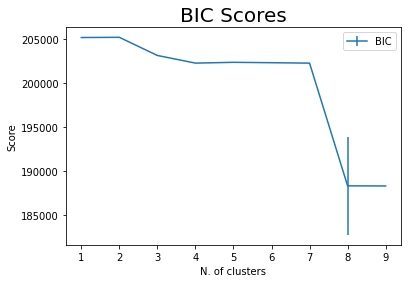

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(1, 10)
n_samples = 20000
bics=[]
bics_err=[]
iterations=10
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        rng = np.random.default_rng(seed=0)
        subL = L[rng.choice(np.arange(len(L)), n_samples)].reshape(-1, 1)
        gm= GaussianMixture(n, n_init=2).fit(subL) 
        
        tmp_bic.append(gm.bic(subL))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)


print(bics[0])

plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [ ]:
#Pick the optimal n_components from BIC scores
def Nthreshold(bics, n_clusters):
  bics = np.array(bics)
  bics = sklearn.preprocessing.normalize(bics.reshape(-1, 1))
  print(bics)
  for n in n_clusters:
    if abs(bics[n]-bics[n+1]) <= 0.1*abs(bics[0]-bics[8]):
      n_components = n
      break   
  return n_components

n_components = Nthreshold(bics, n_clusters)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


#Use elbow point to determine the optimal n_components

In [ ]:
from kneed import KneeLocator
#use Kneed to find the elbow point from BIC score to determine n_components
kn = KneeLocator(n_clusters, bics, curve='convex', direction='decreasing')
print(kn.knee)

n_components = kn.knee

1


#fit GMM

In [ ]:
n_components =4
#fit GMM to the data
def sample_and_fit(L, n_components, n_samples = 20000):
  rng = np.random.default_rng(seed=0)
  subL = L[rng.choice(np.arange(len(L)), n_samples)].reshape(-1, 1)
  gm = GaussianMixture(n_components, random_state=0, covariance_type='full', weights_init= None, means_init=None).fit(subL)
  print(subL)
  return gm, subL
gm, subL = sample_and_fit(L, n_components)

[[ 37.509]
 [ 67.877]
 [ 79.672]
 ...
 [  8.372]
 [ 39.27 ]
 [173.136]]


#Visualize different Gaussians

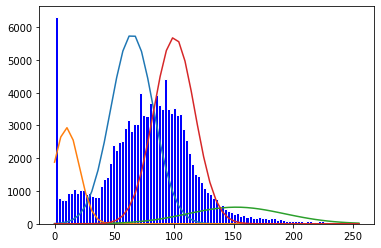

In [ ]:
def pltpeak(gm, L, n_components):
  for x in range(0, n_components):
    mean_x = gm.means_[x][0] 
    std_x = np.sqrt(gm.covariances_[x][0][0])
    weight_x = gm.weights_[x]
    val, bins, _ = plt.hist(L, bins=100, color = 'b', edgecolor = 'white', density=False)
    area = sum(np.diff(bins)*val)  +  sum(np.diff(bins)*val)
    x = np.linspace(0, 255)
    y = stats.norm.pdf(x, mean_x, std_x)*weight_x*area
    plt.plot(x,y)
  return
p = pltpeak(gm, L, n_components)

In [ ]:
def evaluate(gm):
  gm_x=np.linspace(0, 255).reshape(-1, 1)
  gm_y = np.exp(gm.score_samples(gm_x))
  return gm_x, gm_y
gm_x, gm_y = evaluate(gm)

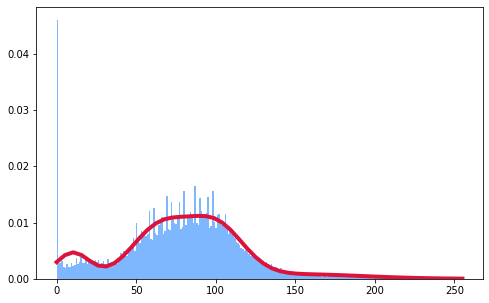

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8,5])
ax.hist(L, bins=255, density=True, alpha=0.5, color="#0070FF")
ax.plot(gm_x, gm_y, color="crimson", lw=4, label="GM")
plt.show()

#use first derivative to determine the possible L_threshold

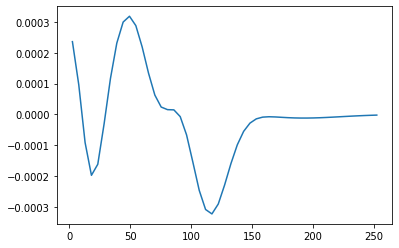

18.214285714285715


In [ ]:
#use first derivative to find the possible location of L_threshold
x = 0.5 * (gm_x[1:] + gm_x[:-1])
diff = np.diff(gm_y)/np.diff(gm_x.flatten())
fig, ax = plt.subplots()
ax.plot(x, diff)
plt.show()

kn = KneeLocator(x.flatten(), diff, curve='convex', direction='decreasing')
print(kn.knee)

#Calculate the intersections of GMM

In [ ]:
from itertools import combinations

def mixture_intersection(gm, n_components):
    clusters = np.arange(0, n_components)
    res = list(combinations(clusters, 2))
    for a, b in res:      
      def intersection(gm):
        x = np.linspace(gm.means_[a][0], gm.means_[b][0])       
        dstns = [gm.weights_[i] * stats.norm(gm.means_[i], np.sqrt(gm.covariances_[i])).pdf(x) for i in (a , b)]
        f = (dstns[1]-dstns[0]).flatten()
        # find number of zero-crossings
        neg = (f < 0).astype(int)
        cross = np.argwhere(np.abs(neg[1:] - neg[:-1]) == 1).flatten()   
        return x[cross[0]]

      print(intersection(gm))
    return
    return

mixture_intersection(gm, n_components)

29.08922586070137
107.67390239809617
83.00583057312798
41.915243794299826
41.33362881848137
139.4323898648538
